# Social Networks and Text Analysis

Student ID: 660030047

In [1]:
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Question 1

/Users/liamvinson/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


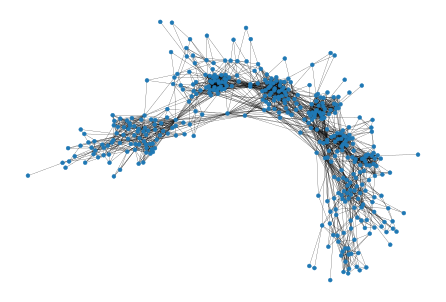

In [3]:
# 1.a
Gx = nx.read_edgelist('infect-dublin.edges')
nx.draw(Gx, node_size=15, width=0.2, linewidths=0.5)
plt.show()

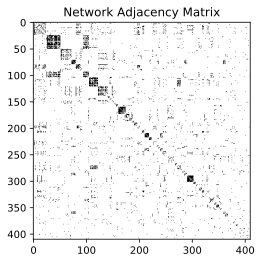

In [4]:
# 1.b
# Create adjacency matrix.
binaryMask = nx.to_numpy_matrix(Gx)

plt.title('Network Adjacency Matrix')
plt.imshow(binaryMask, cmap='binary', interpolation='none')
plt.show()

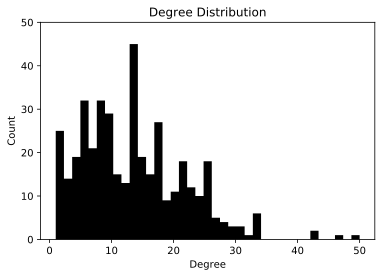

In [5]:
# 1.c
# Get degree for each node.
degrees = [Gx.degree(n) for n in Gx.nodes()]

plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.ylim(0, 50)
plt.hist(degrees, len(np.unique(degrees)), histtype='stepfilled', color='k')
plt.show()

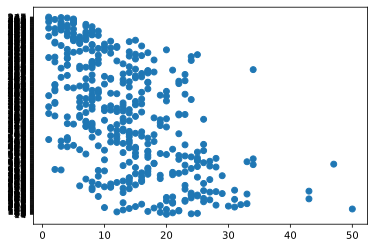

In [6]:
# 1.d
knn = nx.average_neighbor_degree(Gx)

plt.scatter(degrees, list(knn))
plt.show()

# Question 2

In [7]:
# 2.a

The closeness centrality measures gives a score to every node depending on its closeness to all other nodes in a network. This is done technically by calculating shortest paths between all nodes and then finding the sum of the all path lengths. On the other hand the eigenvector centrality is similar to the degree centrality however it is taken a step further. Instead of simply counting links, the links are weighted depending on the degree of a node that the link is connected to. This makes it usefull to determine nodes that have a large influence over the whole network not just directly connected nodes.

The closeness centrality is useful when looking for nodes that can influence the entire network most quickly. An example of where this would be useful is when you need to spread information with limited resources. Giving the information to high scoring nodes in this case will mean that the information can be spread to all other individuals within a small number of links and therefore a short amount of time.

The eigenvector centrality is good as an all-round score, an example of where this could be used is in ranking websites. Whilst degree centrality may be thought of first the downside is that if a very popular website links to a webpage degree centrality will not give this webpage a good score whilst eigenvector will. Therefore it is why a division of eignvector centrality called 'pagerank' is used in search engines.

In [8]:
# 2.b.i
def centrality_closeness(G):
    '''
    Finds the centrality of each node in a graph G.
    
    Return a dictionary containg the nodes and normalised values of the closeness centrality.
    '''
    
    results = {}
    N = len(G)
    
    # For every node.
    for node in G.nodes():
        
        # Calculate paths
        paths = nx.shortest_path_length(G, node)
        
        # Add normalised result to the dictionary results.
        results[node] = N / sum(paths.values())
    
    return results

Pearson correlation score: 0.6759201450854748


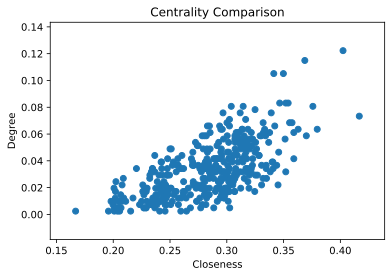

In [9]:
# 2.b.ii

# Calculate centralities.
closeGx = centrality_closeness(Gx)
degGx = nx.degree_centrality(Gx)

# Calculate correlation.
correlation = np.corrcoef(list(closeGx.values()), list(degGx.values()))
print('Pearson correlation score:', correlation[0, 1])

# Plot scatter graph.
plt.title('Centrality Comparison')
plt.xlabel('Closeness')
plt.ylabel('Degree')
plt.scatter(list(closeGx.values()), list(degGx.values()))
plt.show()

The scatter plot shows that there is a clear correlation within this data. The higher the closeness centrality is the more likely the degree centrality will be. Additionally the pearson correlation score returned a value of 0.68 which reinforces that there is a fairly strong correlation.

A high degree centrality means there are lots of links connected to a node. These nodes will each lead to a different part of the graph, whilst most will be connected to close nodes some may stretch accross the graph and lead to other communities. The higher the degree the higher the likelihood to have these community spanning links. These links means it is only a short distance to other nodes in these communities and so a high degree leads to short paths to many nodes which represents the closeness centrality.

In [10]:
# 2.c

The appropriate centrality measure to use is determined by a variety of factors. The main one being do the users pass on information about the products they are exposed to through advertising. If this is a no then the best method to use would be degree centrality as this would cause the product to be exposed to as many people as possible. On the other hand if the audience do share information about advertised products then the best measure to use would either be eigenvector or closeness centrality. In this case I would use closeness centrality.

In [11]:
d = nx.closeness_centrality(Gx)
influencer = max(d, key = d.get)

In [12]:
# 2.d
def Draw_ego_network(G, layout, nodeID, radius, colors=['m', 'b', 'c']):
    '''
    Draws graph and overlays ego networks and shows colors based of distance from original node.
    '''
    
    # Base graph.
    nx.draw(Gx, pos=layout, node_size=15, width=0.1, linewidths=0.1, node_color='#cccccc')

    # Calculate ego graphs for certain radius and plot.
    for i in range(radius):
        subR = radius - i
    
        ego = nx.ego_graph(G, nodeID, subR)
        nx.draw(ego, pos=layout, node_size=25, width=0.1, linewidths=0.1, node_color=colors[i])
    
    plt.show()

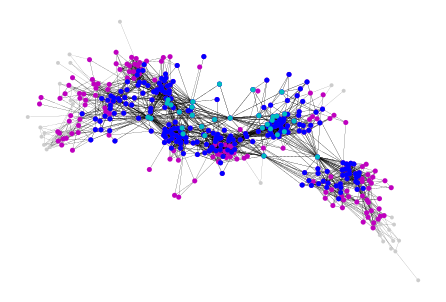

In [13]:
# Run draw ego network.
layout = nx.spring_layout(Gx)
Draw_ego_network(Gx, layout, influencer, 3)

Community size: 131
Chosen node: 157


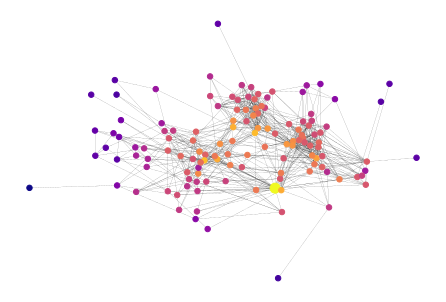

Community size: 98
Chosen node: 217


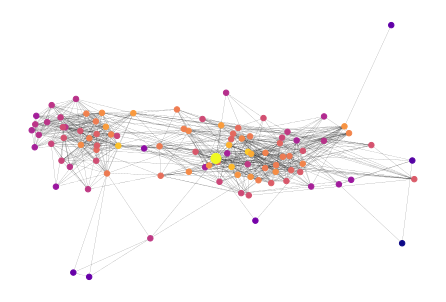

In [14]:
# 2.e
# Find communities.
coms = nx.community.modularity_max.greedy_modularity_communities(Gx)

# Assign two biggest comunities.
com1 = Gx.subgraph(coms[0])
com2 = Gx.subgraph(coms[1])

for c in [com1, com2]:

    # Calculate centrality of each community.
    cent = nx.closeness_centrality(c)

    # Find highest scoring nodes.
    choice = max(cent, key = cent.get)

    # Assign color and sizes.
    colors = []
    sizes = []
    for i in c.nodes():
        if i == choice:
            sizes.append(100)
        else:
            sizes.append(30)
            
    # Print results.
    print('Community size:', len(c))
    print('Chosen node:', choice)

    # Draw graph.
    nx.draw(c, cmap=plt.cm.plasma, pos=layout, node_color=list(cent.values()), nodelist=list(cent.keys()), node_size=sizes, width=0.1)
    plt.show()

I am using the closeness metric because it measures the shortest paths to all other nodes. This is a good measure because if a delivery needs to be made to any other node it will always be relatively small in most cases. The graph shows the node to be chosen as slightly larger than all others, the visualisations show that the nodes are located in the center of the communities which means they will be able to access most nodes in a short amount of time.

# Question 3

In [15]:
# 3.a
def SI_model(G, initial_infecteds, beta, t_simulation):
    '''
    Simulates SI model based of input parameters.
    
    Return dictionary of nodes with values that are a list detailing the nodes status at each timestep.
    '''
    
    infected = set(initial_infecteds)
    output = {key: [] for key in G.nodes()}
    
    # For every time step
    for t in range(t_simulation):
        
        # Determine for every node.
        for node in G.nodes():
            
            # Except if already infected.
            if node in infected:
                continue
            
            # Work out number of possible incoming infectededs.
            incoming = len(infected & set(G.neighbors(node)))
            
            # Generate simulated chance of becoming infected.
            for i in range(incoming):
                if np.random.rand() < beta:
                    infected.add(node)
        
        # Update output
        for key, value in output.items():
            if key in infected:
                output[key] = value + ['I']
            else:
                output[key] = value + ['S']
        
    return output


def calcResults(nodes, vac=False):
    '''
    Turns results from model into plottable data.
    '''
    
    nodes = np.array(list(nodes.values()))
    
    res = []
    for i in range(np.size(nodes, 1)):
        
        if vac:
            inf = np.count_nonzero(nodes[:,i] == 'I')
            suc = np.count_nonzero(nodes[:,i] == 'S')
            vac = np.count_nonzero(nodes[:,i] == 'V')
            res.append([inf, suc, vac])
        
        else:
            inf = np.count_nonzero(nodes[:,i] == 'I')
            suc = np.count_nonzero(nodes[:,i] == 'S')
            res.append([inf, suc])
        
    return np.array(res)


def plotResults(results, title):
    '''
    Plots output from calcResults as graph.
    '''
    domain = range(len(results))
    
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Number of People')
    plt.plot(domain, results)
    plt.legend(['Infected', 'Succeptible', 'Vaccinated'])
    plt.show()

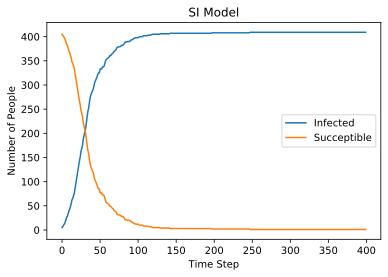

In [16]:
initInf = np.random.choice(Gx.nodes, 3)
nodes = SI_model(Gx, initInf, 0.01, 400)
resSI = calcResults(nodes)
plotResults(resSI, 'SI Model')

In [17]:
# 3.b
def SIV_model(G, initial_infecteds, beta, t_simulation, initital_vac):
    
    infected = set(initial_infecteds)
    vaccinated = set(initital_vac)
    output = {key: [] for key in G.nodes()}
    
    for t in range(t_simulation):
        
        # Determine for every node.
        for node in G.nodes():
            
            # Except if already infected.
            if node in infected:
                continue
                
            # Or if vaccinated.
            if node in vaccinated:
                continue
            
            # Work out number of possible incoming infectededs.
            incoming = len(infected & set(G.neighbors(node)))
            
            # Generate simulated chance of becoming infected.
            for i in range(incoming):
                if np.random.rand() < beta:
                    infected.add(node)
        
        # Update output
        for key, value in output.items():
            if key in vaccinated:
                output[key] = value + ['V']
            elif key in infected:
                output[key] = value + ['I']
            else:
                output[key] = value + ['S']
    
    return output

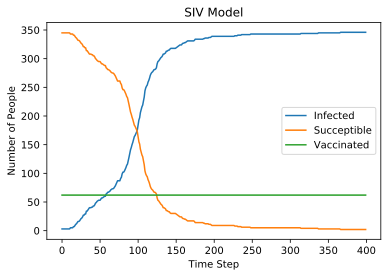

In [18]:
initVac = np.random.choice(Gx.nodes, 70)
nodes = SIV_model(Gx, initInf, 0.01, 400, initVac)
resSIV = calcResults(nodes, True)
plotResults(resSIV, 'SIV Model')

You just became advisor of the public health ministry. The ministry wants a suggestion to whom give the 70 doses of the vaccine. You can select the 70 nodes which give the vaccine. Taking in consideration the metrics we saw during the Lectures and Labs which nodes you will select? Why? Motivate your answer.

In [19]:
# 3.c
betweenness = nx.betweenness_centrality(Gx).items()
sortedBet = sorted(betweenness, key = lambda x : x[1], reverse = True)
bestVac = np.array(sortedBet[:70])[:,0]

I choose to use the betweenness metric, this is a measure of the number of times this node is in the shortest path of all nodes in a network. The nodes that score highly on this are those that influence the flow around a network. This is usefull for our vaccines because by blocking these nodes the path to certain nodes can be blocked and means somepeople may become unreachable. Additionally it will slow down the the spread because the shortest path is blocked meaning it will take longer to reach certain nodes.

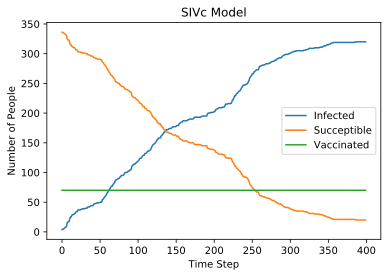

In [20]:
# 3.d
nodes = SIV_model(Gx, initInf, 0.01, 400, bestVac)
resSIVc = calcResults(nodes, True)
plotResults(resSIVc, 'SIVc Model')

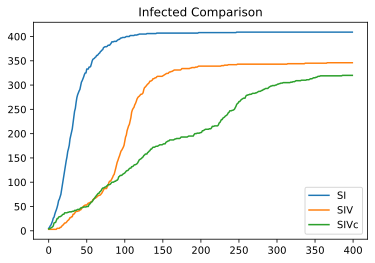

In [21]:
plt.title('Infected Comparison')
domain = range(400)
plt.plot(domain, resSI[:,0], label='SI')
plt.plot(domain, resSIV[:,0], label='SIV')
plt.plot(domain, resSIVc[:,0], label='SIVc')
plt.legend()
plt.show()

The results show that the fastest spreading and deadliest model was SI. There were no protected individuals so the virus was able to spread without interruption. The SIV model allowed us to randomly select 70 nodes to vacccinate. Whilst this had the effect of taking longer to spread the disease to other nodes eventually all of the unprotected individuals will become infected because the network is quite well connected. The final SIVc model had even slower infection rate and even peaked out without every one unvaccinated becoming infected. I predict this is because my choice of people to be vaccinated has blocked some communities from becoming infected at all.